First 5 rows of the data:
                          seq   rt_min_1    rt_hi_1   rt_min_2    rt_hi_2  \
0  AAAAPVTGPLADDPIQETITFDDFAK  59.671000  20.359521  56.905944  20.394106   
1            AAAFEGELIPASQIDR  46.207000  14.623440  44.625346  14.750147   
2            AAATQEMTLVDTPNAK  35.761000  10.173122  34.624497  10.153922   
3            AADIVLQAAIAAGAPK  50.177809  16.315128  48.068631  16.332624   
4            AAELAGNDTIPVEITR  42.511000  13.048830  41.131469  13.144419   

    rt_min_3    rt_hi_3   rt_min_4    rt_hi_4   rt_min_5    rt_hi_5  \
0  57.700000  19.602096  57.500000  19.654744  59.525375  21.305896   
1  45.950393  14.275683  45.858314  14.331508  45.707310  14.868190   
2  36.088619   9.805076  35.951003   9.801325  35.140958   9.945427   
3  49.710557  15.980267  49.392964  15.947749  48.679674  16.252987   
4  42.417000  12.673901  42.267000  12.689356  41.514911  12.914991   

   range_min   std_min  range_hi    std_hi    cv_min     cv_hi  
0   2.765056  1.256

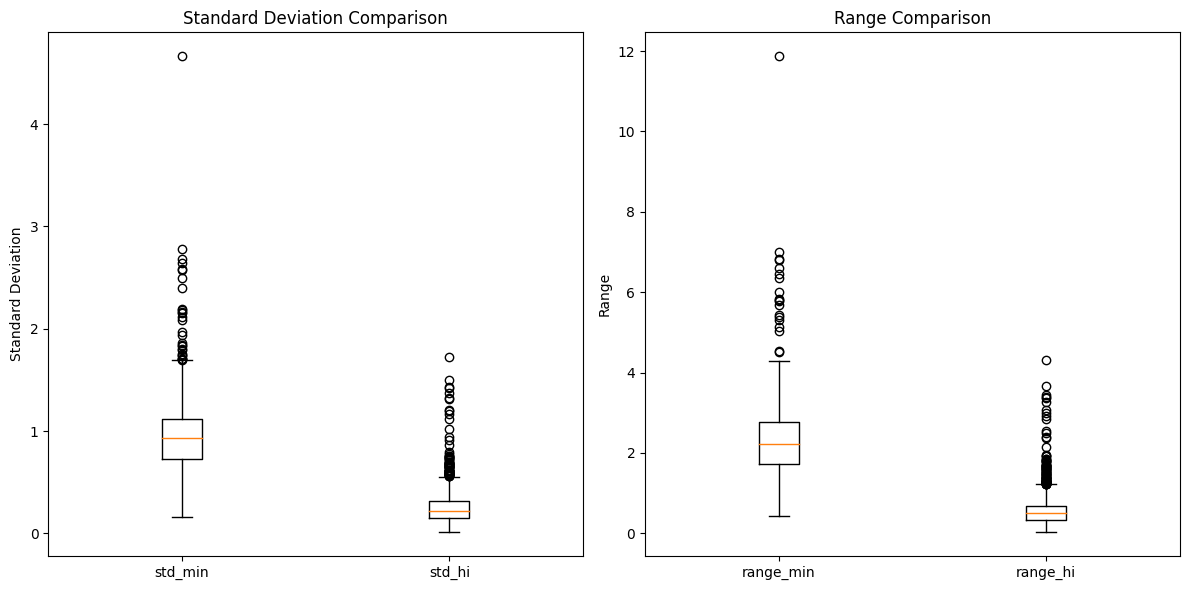

Done. Output written to: C:\Users\alexp\OneDrive\Desktop\2025 Flp Paper\common_peptides_across_all_experiments.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv(r"C:\Users\alexp\OneDrive\Desktop\2025 Flp Paper\6_run_repoducibility.csv")

num_experiments = 5
dfs = []

# Loop over each experiment
for i in range(1, num_experiments + 1):
    # Extract and clean each experiment's data
    temp = df[[f'seq{i}', f'rt_min{i}', f'rt_hi{i}']].copy()
    temp.columns = ['seq', f'rt_min_{i}', f'rt_hi_{i}']
    
    # Drop duplicates to prevent explosion on merge
    temp = temp.drop_duplicates(subset='seq')
    
    dfs.append(temp)

# Inner join on 'seq' so only peptides found in all experiments are kept
merged = dfs[0]
for i in range(1, num_experiments):
    merged = pd.merge(merged, dfs[i], on='seq', how='inner')

# Calculate range and standard deviation for both rt_min and rt_hi across all experiments
merged['range_min'] = merged[[f'rt_min_{i}' for i in range(1, num_experiments + 1)]].max(axis=1) - merged[[f'rt_min_{i}' for i in range(1, num_experiments + 1)]].min(axis=1)
merged['std_min'] = merged[[f'rt_min_{i}' for i in range(1, num_experiments + 1)]].std(axis=1)

merged['range_hi'] = merged[[f'rt_hi_{i}' for i in range(1, num_experiments + 1)]].max(axis=1) - merged[[f'rt_hi_{i}' for i in range(1, num_experiments + 1)]].min(axis=1)
merged['std_hi'] = merged[[f'rt_hi_{i}' for i in range(1, num_experiments + 1)]].std(axis=1)

# Calculate Coefficient of Variation (CV) for rt_min and rt_hi
merged['cv_min'] = merged['std_min'] / merged[[f'rt_min_{i}' for i in range(1, num_experiments + 1)]].mean(axis=1)
merged['cv_hi'] = merged['std_hi'] / merged[[f'rt_hi_{i}' for i in range(1, num_experiments + 1)]].mean(axis=1)

# Optional: sort for readability
merged = merged.sort_values('seq').reset_index(drop=True)

# Show the first 5 rows of the data
print("First 5 rows of the data:")
print(merged.head())

# Visualization: Compare variability between rt_min and rt_hi
plt.figure(figsize=(12, 6))

# Box plots for range and standard deviation comparison
plt.subplot(1, 2, 1)
plt.boxplot([merged['std_min'], merged['std_hi']], labels=['std_min', 'std_hi'])
plt.title('Standard Deviation Comparison')
plt.ylabel('Standard Deviation')

plt.subplot(1, 2, 2)
plt.boxplot([merged['range_min'], merged['range_hi']], labels=['range_min', 'range_hi'])
plt.title('Range Comparison')
plt.ylabel('Range')

plt.tight_layout()
plt.show()

# Save result
output_file = r'C:\Users\alexp\OneDrive\Desktop\2025 Flp Paper\common_peptides_across_all_experiments.csv'
merged.to_csv(output_file, index=False)

print(f"Done. Output written to: {output_file}")



In [5]:
# Show the first 5 rows of the DataFrame
print("First 5 rows of the data:")
print(merged.head())

First 5 rows of the data:
                          seq   rt_min_1    rt_hi_1   rt_min_2    rt_hi_2  \
0  AAAAPVTGPLADDPIQETITFDDFAK  59.671000  20.359521  59.671000  20.359521   
1            AAAFEGELIPASQIDR  46.207000  14.623440  46.207000  14.623440   
2            AAATQEMTLVDTPNAK  35.761000  10.173122  35.761000  10.173122   
3            AADIVLQAAIAAGAPK  50.177809  16.315128  50.177809  16.315128   
4            AAELAGNDTIPVEITR  42.511000  13.048830  42.511000  13.048830   

    rt_min_3    rt_hi_3   rt_min_4    rt_hi_4   rt_min_5    rt_hi_5  \
0  56.905944  20.394106  57.700000  19.602096  57.500000  19.654744   
1  44.625346  14.750147  45.950393  14.275683  45.858314  14.331508   
2  34.624497  10.153922  36.088619   9.805076  35.951003   9.801325   
3  48.068631  16.332624  49.710557  15.980267  49.392964  15.947749   
4  41.131469  13.144419  42.417000  12.673901  42.267000  12.689356   

    rt_min_6    rt_hi_6  range_min   std_min  range_hi    std_hi  
0  59.525375  21.